# In this Notebook

1. Collaborative filtering

    1.1 Neighborhood-based methods
    
2. Item-Based Recommender System

## 1. Collaborative filtering

Collaborative filtering methods are based on collecting and analyzing a large amount <br>of information on users’ behaviors, activities or preferences and predicting what users will like based on their similarity to other users. 
- Hyphothesis: Similar users tend to like similar items.
- Problem: Requires a user community.

It can be understood as a generalization of Supervised Classication:
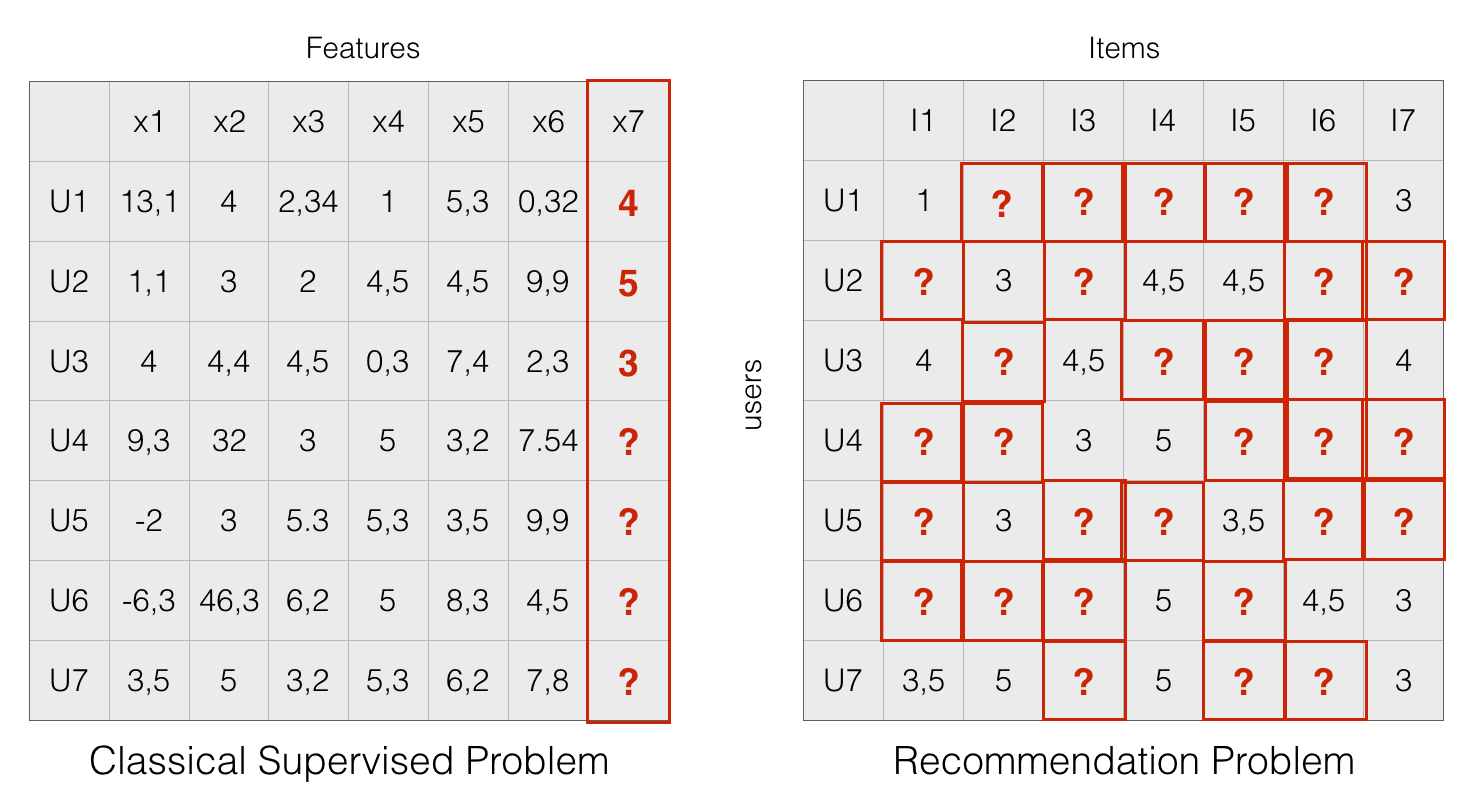
<br>

<p><b>Several</b> methods but <b>one (or two main) </b> approaches
<ol>

<li>Memory-Based Methods (Neighborhood-based methods) </li>
<li>Model-Based Methods</li>
</ol>

### 1.1 Neighborhood-based methods
Two main types: User-based and Item-based.
        
* User-based CF works like this: take a user U and a set of other users D whose ratings are similar to the ratings of the selected user U and use the ratings from those like-minded users to calculate a prediction for the selected user U.

<img src=https://dataaspirant.files.wordpress.com/2015/01/userbased.png width=700>
<center>Original source: https://dataaspirant.files.wordpress.com</center>

* In Item-based CF you build an item-item matrix determining relationships between pairs of items and using this matrix and data on the current user, infer the user’s taste. Typicaly used in the domain: people who buy x also buy y
<img src="images/neighbourhood.png" width=600>

### EXAMPLE: Movie Recommender System. User-Based Collaborative Filtering


#### What do we need to build a Movie Recommendation System?

#### Steps in order to create a CF - Recommender
+ Data recollection
+ Data filtering/cleaning
+ Item/user similarity function
+ Learning/Prediction funciton

Given an "active user" (Joan) and an item that has not been seen by the user, the goal is to estimate the rating for the item.
<table style="width:60%">
  <tr>
    <td></td>
    <td>Superman</td> 
    <td>Star Wars 1</td>
    <td>Matrix</td>
    <td>Spiderman</td>
    
  </tr>
  <tr>
    <td>Santi</td>
    <td>3</td> 
    <td>3.5</td>
    <td>4.5</td>
    <td><font color="red"><b>¿?</b></font></td>
  </tr>
  <tr>
    <td>User1</td>
    <td>3.5</td> 
    <td>4</td>
    <td>5</td>
    <td>5</td>
  </tr>
  <tr>
    <td>User2</td>
    <td>3</td> 
    <td><font color="red"><b>¿?</b></font></td>
    <td>4.5</td>
    <td>3</td>
  </tr>
  <tr>
    <td>User3</td>
    <td>3.5</td> 
    <td>5</td>
    <td>3.5</td>
    <td>2</td>
  </tr>
</table>

<br><br><br><br>



### How to measure similarity between users?
The similarity computation between the items is one critical step in the CF algorithms. The basic idea in similarity computation between two users <i>a</i> and <i>b</i> is to first isolate the items commonly rated by both users (set <i>P</i>), and then to apply a similarity computation technique to determine the similarity.
    <ul>
    <li>Euclidean distance</li>
    $$sim(a,b) = \sqrt{\sum_{p \in P}{(r_{a,p} - r_{b,p})^2}}$$
    <br>
    <li>Pearson Correlation</li>
    $$sim(a,b) = \frac{\sum_{p\in P} (r_{a,p}-\bar{r_a})(r_{b,p}-\bar{r_b})}{\sqrt{\sum_{p \in P}(r_{a,p}-\bar{r_a})²}\sqrt{\sum_{p \in P}(r_{b,p}-\bar{r_b})²}}$$
    <br>
    <li>Cosine distance</li>
    $$ sim(a,b) = \frac{\vec{a}· \vec{b}}{|\vec{a}| * |\vec{b}|}$$
    <br>
    </ul>
<br>
Where: 

* $sim(a,b)$ is the similarity between user "a" and user "b"
* $P$ is the set of common rated movies by user "a" and "b"
* $r_{a,p}$ is the rating of movie "p" by user "a"
* $\bar{r_a}$ is the mean rating given by user "a"

<br>



### Some issues to take into account

- Pearson Correlation used to work better than Euclidean distance since it is based more on the ranking than on the values.
- Cosine distance is usually used when our data is binary/unary, i.e., like vs. not like or buy vs. not buy.
- What happens if two users have very few items in common?

### How do we generate a prediction from the neighbour's ratings?

$$
\text{pred}(a, p) = \frac{\sum_{b \in N} \text{sim}(a, b) \cdot r_{b, p}}{\sum_{b \in N} \text{sim}(a, b)}
$$

Example:
| Critic | $\text{sim}(a,b)$ | Rating Movie1: $r_{b,p_1}$ | $\text{sim}(a,b) \cdot r_{b,p_1}$ | Rating Movie2: $r_{b,p_2}$ | $\text{sim}(a,b) \cdot r_{b,p_2}$ |
|--------|--------------------|-----------------------------|-----------------------------------|-----------------------------|-----------------------------------|
| User1  | 0.99               | 3                           | 2.97                              | 2.5                         | 2.48                              |
| User2  | 0.38               | 3                           | 1.14                              | 3                           | 1.14                              |
| User3  | 0.89               | 4.5                         | 4.00                              | -                           | -                                 |
| User4  | 0.92               | 3                           | 2.77                              | 3                           | 2.77                              |
| $\sum_{b \in N} \text{sim}(a,b) \cdot r_{b,p}$ | | | 10.87 | | 6.39 |
| $\sum_{b \in N} \text{sim}(a,b)$ | | | 3.18 | | 2.29 |
| $\text{pred}(a,p)$ | | | 3.41 | | 2.79 |

### Evaluation: performance criterion
Performance evaluation of recommendation systems is an entire topic all in itself. Some of the options include:
* $RMSE = \sqrt{(\frac{\sum(\hat{y}-y)^2}{n})}$
* Precision / Recall / F-scores
* ROC curves
* Cost curves

In [1]:
import numpy as np

def compute_rmse(y_pred, y_true):
    """ Compute Root Mean Squared Error. """
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2)))

#### Download Movilens Database
We will work with the well known MovieLens dataset (http://grouplens.org/datasets/movielens/). This dataset was initially constructed to support participants in the Netflix Prize. Today, we can find several versions of this dataset with different amout of data, from 100k samples version to 20m sample version. Although performance on bigger dataset is expected to be better, we will work with the smallest dataset: MovieLens 100K Dataset (ml-100k-zip). Working with this lite version has the benefit of less computational costs

With a unix machine the dataset can be downloaded with the following code:

In [2]:
#!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip 
#!unzip ml-100k.zip -d "data/"

If you are working with a windows machine, please go to the website and download the 100k version and extract it to the subdirectory named "data/ml-100k/"

Once you have downloaded and unzipped the file into a directory, you can create a DataFrame with the following code:

In [5]:
#NETFLIX REAL 50.000.000 usuaris and 100.000 items
%autosave 150
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

# Load Data set
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols)

# the movies file contains columns indicating the movie's genres
# let's only load the first three columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(3), encoding='latin-1')

# Construcció del DataFrame
data = pd.merge(pd.merge(ratings, users), movies)
data = data[['user_id','title', 'movie_id','rating','release_date','sex','age']]

print("The BD has "+ str(data.shape[0]) +" ratings")
print("The BD has ", data.user_id.nunique()," users")
print("The BD has ", data.movie_id.nunique(), " movies")
data.head()

Autosaving every 150 seconds
The BD has 100000 ratings
The BD has  943  users
The BD has  1682  movies


,user_id,title,movie_id,rating,release_date,sex,age
0,196,Kolya (1996),242,3,24-Jan-1997,M,49
1,186,L.A. Confidential (1997),302,3,01-Jan-1997,F,39
2,22,Heavyweights (1994),377,1,01-Jan-1994,M,25
3,244,Legends of the Fall (1994),51,2,01-Jan-1994,M,28
4,166,Jackie Brown (1997),346,1,01-Jan-1997,M,47


#### Let's first explore the data set


In [6]:
#### Create a function that allows us to divide the dataset into:
#### training and test
def assign_to_set(df):
    sampled_ids = np.random.choice(df.index,
                                   size=np.int64(np.ceil(df.index.size * 0.2)),
                                   replace=False)
    df.loc[sampled_ids, 'for_testing'] = True
    return df

def create_train_test(data,key = 'user_id'):
    data['for_testing'] = False
    grouped = data.groupby(key, group_keys=False).apply(assign_to_set)
    # dataframe used to train our model
    data_train = data[grouped.for_testing == False]
    # dataframe used to evaluate our model
    data_test = data[grouped.for_testing == True]
    return data_train, data_test

data_train, data_test =  create_train_test(data)
print(data_train.shape, data_test.shape)

print("Training data_set has "+ str(data_train.shape[0]) +" ratings")
print("Test data set has "+ str(data_test.shape[0]) +" ratings")
print("The BD has ", data.movie_id.nunique(), " movies")

(79619, 8) (20381, 8)
Training data_set has 79619 ratings
Test data set has 20381 ratings
The BD has  1682  movies


/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/1095289518.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = data.groupby(key, group_keys=False).apply(assign_to_set)


#### How to get the set of movies from user with id  "1"?

In [7]:
data_train[data_train.user_id==1].head(5)

,user_id,title,movie_id,rating,release_date,sex,age,for_testing
202,1,Three Colors: White (1994),61,4,01-Jan-1994,M,24,False
305,1,"Grand Day Out, A (1992)",189,3,01-Jan-1992,M,24,False
333,1,Desperado (1995),33,4,01-Jan-1995,M,24,False
334,1,Glengarry Glen Ross (1992),160,4,01-Jan-1992,M,24,False
478,1,Angels and Insects (1995),20,4,01-Jan-1995,M,24,False


#### Mean Rating of movies seen by user "1"

In [8]:
data_train[data_train.user_id==1].rating.mean()

3.589861751152074

#### Mean rating of movie with title "Seven (Se7en) (1995)"

In [9]:
data_train.rating[data_train.title=="Seven (Se7en) (1995)"].mean()

3.787709497206704

#### Which are the 10 most rated movies?

In [10]:
data_train.groupby('title').size().sort_values(ascending=False).head(10)

title
Star Wars (1977)                  457
Return of the Jedi (1983)         408
Contact (1997)                    401
Fargo (1996)                      399
Scream (1996)                     390
English Patient, The (1996)       385
Liar Liar (1997)                  384
Toy Story (1995)                  357
Raiders of the Lost Ark (1981)    340
Godfather, The (1972)             340
dtype: int64

#### Which are the 10 movies with the highest score

In [11]:
data_train.groupby('title').rating.mean().sort_values(ascending=False).head(5)
#data_train.groupby('title').rating.mean().sort_values().tail(5)

title
Delta of Venus (1994)                                5.0
Nico Icon (1995)                                     5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Someone Else's America (1995)                        5.0
Name: rating, dtype: float64

#### Top movies rated more than 10 times

In [12]:
size = data_train.groupby('title').size()
mean_score = data_train.groupby('title').rating.mean()
mean_score[size>10].sort_values(ascending=False).head()

title
Some Folks Call It a Sling Blade (1993)                   4.500000
Close Shave, A (1995)                                     4.494505
Wallace & Gromit: The Best of Aardman Animation (1996)    4.481481
Schindler's List (1993)                                   4.474359
Wrong Trousers, The (1993)                                4.453608
Name: rating, dtype: float64

#### Which is the distibution of rated movies per user?

<Axes: >

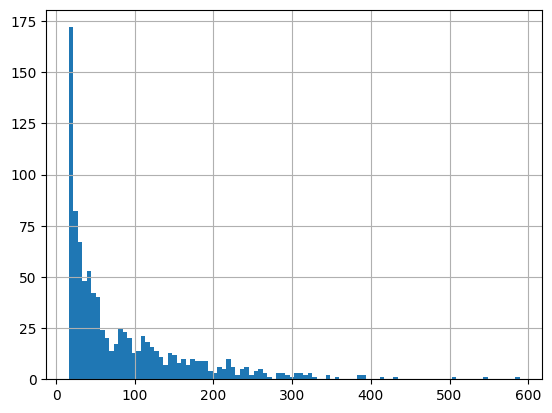

In [13]:
rated_movies = data_train.groupby('user_id').size().sort_values(ascending=False)
rated_movies.hist(bins=100)

#### Which is the mean movie scores per year?

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/4138543016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['release_year'] = data_train['release_date'].apply(lambda x: int(str(x)[-4:])


(3.3114543114543116, 4.393364928909953)

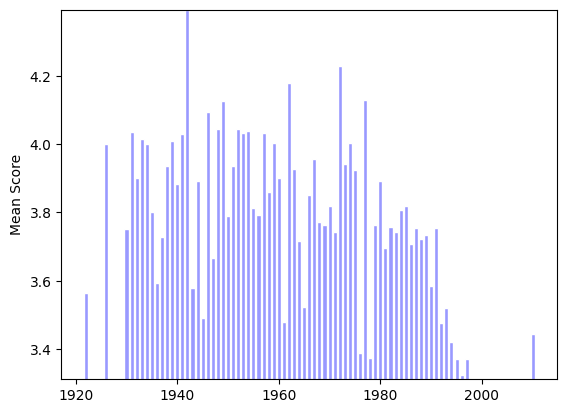

In [14]:
from math import isnan
data_train['release_year'] = data_train['release_date'].apply(lambda x: int(str(x)[-4:]) 
                                                                    if isnan(float(str(x)[-4:]))==False 
                                                                    else 2010)
rank_per_year = data_train.groupby('release_year')['rating'].mean()
plt.bar(rank_per_year.keys(), rank_per_year, facecolor='#9999ff', edgecolor='white')
plt.ylabel("Mean Score")
plt.ylim((min(rank_per_year),max(rank_per_year)))

#### Which movies are most controversial amongst different ages?

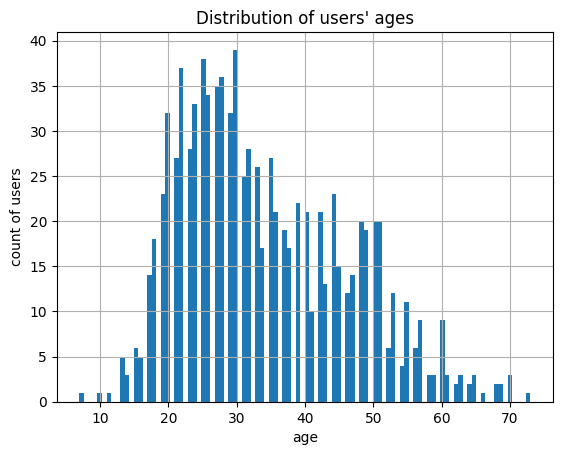

   movie_id  age age_group
1       302   39     30-39
2       377   25     20-29
5       474   44     40-49
6       265   31     30-39
7       465   26     20-29
          rating          
            size      mean
age_group                 
0-9           34  4.058824
10-19       6511  3.490094
20-29      31490  3.467545
30-39      20465  3.554263
40-49      11951  3.593423
50-59       6926  3.629223
60-69       2087  3.660757
70-79        155  3.677419


/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/578080814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['age_group'] = pd.cut(data_train.age, range(0, 81, 10), right=False, labels=labels)
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/578080814.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data_train.groupby('age_group').agg({'rating': [np.size, np.mean]}).copy())
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/578080814.py:10: FutureWarning: The provided callable <function mea

In [15]:
users.age.hist(bins=100)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')
plt.show()

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data_train['age_group'] = pd.cut(data_train.age, range(0, 81, 10), right=False, labels=labels)
print(data_train[['movie_id','age', 'age_group']].head())
print(data_train.groupby('age_group').agg({'rating': [np.size, np.mean]}).copy())

#### Filter films that have received at least 250 ratings:

In [16]:
ratings_by_title = data.groupby('title').size()
print(ratings_by_title[ratings_by_title >= 250].head())

active_titles = ratings_by_title.index[ratings_by_title >= 250]
print(active_titles[:5])

title
2001: A Space Odyssey (1968)    259
Air Force One (1997)            431
Alien (1979)                    291
Aliens (1986)                   284
Amadeus (1984)                  276
dtype: int64
Index(['2001: A Space Odyssey (1968)', 'Air Force One (1997)', 'Alien (1979)',
       'Aliens (1986)', 'Amadeus (1984)'],
      dtype='object', name='title')


#### Obtain the mean ratings for each movie grouped by gender that have at least 250 ratings.

In [17]:
mean_ratings = data.pivot_table('rating', index='title',columns='sex', aggfunc='mean')
mean_ratings = mean_ratings.loc[active_titles]
print(mean_ratings[:5])

sex                                  F         M
title                                           
2001: A Space Odyssey (1968)  3.491228  4.103960
Air Force One (1997)          3.690476  3.606557
Alien (1979)                  3.660714  4.123404
Aliens (1986)                 3.672727  4.013100
Amadeus (1984)                4.038961  4.211055


(disclosure: we are breaking the users into men and women - apologies for any generalizations)
#### Show films more valued by women.

In [18]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:5].F

title
Schindler's List (1993)             4.632911
Shawshank Redemption, The (1994)    4.562500
Usual Suspects, The (1995)          4.333333
Silence of the Lambs, The (1991)    4.320000
Titanic (1997)                      4.278846
Name: F, dtype: float64

#### Conclusion

Now we wonder which movies are rated more differently between men and women. 

Which films have more different rating and are more highly valued by women? And the films preferred by men which doesn't liked women? 

What are the 
films that have generated the most discordant ratings, regardless of gender?

In [19]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
#Sort by'diff':  films have more different rating and are more highly valued by women
sorted_by_diff = mean_ratings.sort_values(by='diff')
print('Best for women\n')
print(sorted_by_diff[:5])

#Switching the order we get the films preferred by men which doesn't liked women
print('\nBest for men\n')
print(sorted_by_diff[:-5:-1])

# We can use standard deviation of the ratings to find the films that have generated the most discordant ratings, regardless of gender
# Standard deviation of rating grouped by title
print("\nMovies with highest controversy:")
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
print(rating_std_by_title.sort_values(ascending=False)[:5])

Best for women

sex                                         F         M      diff
title                                                            
Sense and Sensibility (1995)         4.252632  3.878613 -0.374019
Independence Day (ID4) (1996)        3.688679  3.356037 -0.332642
Birdcage, The (1996)                 3.670455  3.346341 -0.324113
Truth About Cats & Dogs, The (1996)  3.690722  3.371429 -0.319293
Rock, The (1996)                     3.879121  3.634146 -0.244975

Best for men

sex                                  F         M      diff
title                                                     
2001: A Space Odyssey (1968)  3.491228  4.103960  0.612732
Terminator, The (1984)        3.524590  4.037500  0.512910
Alien (1979)                  3.660714  4.123404  0.462690
Aliens (1986)                 3.672727  4.013100  0.340373

Movies with highest controversy:
title
Evita (1996)                   1.234051
Leaving Las Vegas (1995)       1.170368
English Patient, The (1996)    1.

#### Define a function called  <b>top_movies</b> that given a user it returns what movies have the highest rank for this user.

In [20]:
def top_movies(dataFrame,usr):
    max_i = dataFrame[dataFrame.user_id == usr].rating.max() 
    print("Max puntuation of user", usr, "is:", max_i)
    return dataFrame[(dataFrame['user_id'] == usr) & (dataFrame['rating'] == max_i )].title

print(top_movies(data,2))

Max puntuation of user 2 is: 5
924             Shall We Dance? (1996)
1052                  Star Wars (1977)
12150        As Good As It Gets (1997)
16198                   Titanic (1997)
24012                     Kolya (1996)
25216                      Emma (1996)
42959    Wings of the Dove, The (1997)
55790                     Fargo (1996)
59514            Godfather, The (1972)
59823            Secrets & Lies (1996)
76004         Good Will Hunting (1997)
88190     Sense and Sensibility (1995)
95677         L.A. Confidential (1997)
Name: title, dtype: object


####  Which is the similarity between user 1 and user 2?
Let's look first for the common seen movies by the users

In [21]:
# dataframe with the data from user 1
data_user_1 = data_train[data_train.user_id==1]
# dataframe with the data from user 2
data_user_2 = data_train[data_train.user_id==2]
# We first compute the set of common movies
common_movies = set(data_user_1.movie_id).intersection(data_user_2.movie_id)
print("\nNumber of common movies",len(common_movies),'\n')

# create the subdataframe with only with the common movies
mask = data_user_1.movie_id.isin(common_movies)
data_user_1 = data_user_1[mask]
print(data_user_1[['title','rating']].head(3))

mask = (data_user_2.movie_id.isin(common_movies))
data_user_2 = data_user_2[mask]
print(data_user_2[['title','rating']].head(3))


Number of common movies 12 

                                 title  rating
9170                Postino, Il (1994)       5
14425  My Best Friend's Wedding (1997)       2
17672                     Fargo (1996)       5
                         title  rating
924     Shall We Dance? (1996)       5
7973   Mighty Aphrodite (1995)       4
11989      Men in Black (1997)       4


In [22]:
r = pd.merge(data_user_1[['user_id','movie_id','rating']],data_user_2[['user_id','movie_id','rating']],on='movie_id')
r.rating_y,r.rating_x

(0     4
 1     4
 2     5
 3     4
 4     4
 5     4
 6     4
 7     5
 8     4
 9     5
 10    4
 11    4
 Name: rating_y, dtype: int64,
 0     5
 1     2
 2     5
 3     5
 4     5
 5     4
 6     2
 7     5
 8     4
 9     4
 10    5
 11    5
 Name: rating_x, dtype: int64)

#### Let's define a function to compute the users similarity 

In [23]:
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean

# Returns a distance-based similarity score for person1 and person2
def SimEuclid(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id')    
    if len(rep)<2:
        return 0
    if(len(rep)<min_common_items):
        return 0
    #return distEuclid(rep['rating_x'],rep['rating_y']) 
    return 1.0/(1.0+euclidean(rep['rating_x'],rep['rating_y'])) 

# Returns a pearsonCorrealation-based similarity score for person1 and person2
def SimPearson(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)<2:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    
    if(np.isnan(res)):
        return 0
    return res

print(SimPearson(data_train,1,2))
print(SimEuclid(data_train,1,2))

0.22075539284417392
0.21089672205953397


## Let's build the first CF-Recommender System
</div>


In [24]:
import warnings

class CollaborativeFiltering:
    """ Collaborative filtering using a custom sim(u,u'). """
    
    def __init__(self,DataFrame, similarity=SimPearson):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.sim = {}
        
    def fit(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        print("Learning...")
        #warnings.simplefilter("ignore", category="ConstantInputWarning")

        allUsers=set(self.df['user_id'])
        for person1 in allUsers:
            self.sim.setdefault(person1, {})
            a=data_train[data_train['user_id']==person1][['movie_id']]
            data_reduced=pd.merge(data_train,a,on='movie_id')
            for person2 in allUsers:
                if person1==person2: 
                    continue

                self.sim.setdefault(person2, {})

                if(person1 in self.sim[person2]):
                    continue # since is a simetric matrix

                sim=self.sim_method(data_reduced,person1,person2)
                if(sim<0): # Lets put to zero if users are negativly correlated
                    self.sim[person1][person2]=0
                    self.sim[person2][person1]=0
                else:
                    self.sim[person1][person2]=sim
                    self.sim[person2][person1]=sim
                
    def predict(self, user_id, movie_id):
        totals={}
        movie_users=self.df[self.df['movie_id'] ==movie_id]
        rating_num=0.0
        rating_den=0.0
        allUsers=set(movie_users['user_id'])
        for other in allUsers:
            if user_id==other: 
                continue 
            rating_num += self.sim[user_id][other] * float(movie_users[movie_users['user_id']==other]['rating'])
            rating_den += self.sim[user_id][other]
        
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
        return rating_num/rating_den

#### Let's create a small dataset in order to reduce the computation cost and speedup the calculus in the class

In [25]:
import warnings
# Ignore specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="scipy")

dataSmall = data[data['user_id']<100].copy() # get only data from 100 users
print("Now this dataset contains", dataSmall.shape[0],'samples')

dataSmall_train, dataSmall_test =  create_train_test(dataSmall)

print("#Training samples = ",dataSmall_train.shape[0])
print("#Test samples = ",dataSmall_test.shape[0])
print('#Users =', dataSmall.user_id.nunique())
print('#Movies =',dataSmall.movie_id.nunique())

reco = CollaborativeFiltering(dataSmall_train)
reco.fit()
reco.predict(user_id=2, movie_id=1)

Now this dataset contains 10960 samples
#Training samples =  8727
#Test samples =  2233
#Users = 99
#Movies = 1232
Learning...


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/joaor

4.044493756627209

In [26]:
def evaluate(estimate_f,data_train,data_test):
    """ RMSE-based predictive performance evaluation with pandas. """
    ids_to_estimate = zip(data_test.user_id, data_test.movie_id)
    estimated = np.array([estimate_f(u,i) if u in data_train.user_id else 3 for (u,i) in ids_to_estimate ])
    real = data_test.rating.values
    return compute_rmse(estimated, real)

In [27]:
print('RMSE for Collaborative Recomender: %s' % evaluate(reco.predict,dataSmall_train,dataSmall_test))

/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/248685745.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rating_num += self.sim[user_id][other] * float(movie_users[movie_users['user_id']==other]['rating'])


RMSE for Collaborative Recomender: 1.2282289924700291


## <h3><b>How improve the this recommender system?</b></h3>

<h4> 1) Normalization: Predicitions scaled to the user domain.</h4><br>
Users rate differntly, some rate high, while other low. This is the prediction function that was used in the original in Netflix system. Using this function we are scaling the prediction to our mean.<br>

$$pred(a,p) = \bar{r_a} + \frac{\sum_{b \in N}{sim(a,b)*(r_{b,p}-\bar{r_b})}}{\sum_{b \in N}{sim(a,b)}}$$
<br>


Example:
Prediction for the user "a" with $\bar{r_a} = 3.5$

| Critic | $ \text{sim}(a,b) $ | Mean Ratings: $ \bar{r_b} $ | Rating Movie1: $ r_{b,p_1} $ | $ \text{sim}(a,b) \cdot (r_{b,p_1} - \bar{r_b}) $ |
|--------|---------------------|-----------------------------|-----------------------------|---------------------------------------------------|
| User1  | 0.99                | 4.3                         | 3                           | -1.28                                             |
| User2  | 0.38                | 2.73                        | 3                           | 0.10                                              |
| User3  | 0.89                | 3.12                        | 4.5                         | 1.22                                              |
| User4  | 0.92                | 3.98                        | 3                           | -0.90                                             |
| $ \sum_{b \in N} \text{sim}(a,b) \cdot (r_{b,p} - \bar{r_b}) $ |                         |                             |                             | -1.13                                             |
| $ \sum_{b \in N} \text{sim}(a,b) $ |                         |                             |                             | 3.84                                              |
| $ \text{pred}(a,p) $       |                             |                             |                             | 3.20                                              |


<h4> 2) Not all neighbor rating might be equally.</h4><br>
Agreeement on commonly liked items is not as important as agreeement on controversial items. we can give a weigth correlated with the rating variance.

<h4> 3) Value of number of co-rated items</h4>
Reduce the similarity between users when the number of co-rated items is low or discard those users with a small number of co-rated items

<h4> 4) Case amplificiation </h4>
Increase the weigth to those users which are really really similars (~= 1)

<h4> 5) Neighborhood selection</h4>
Only a subset of similar user used to be used. Not-similar users used to be discarded

<h4> 6) Recursive Methods</h4>
In order to avoid cold-start we can apply a recursive method for new users.






<h3>Problems:</h3><br>
<ul>
<li>"Memory-based" approach</li>
<li>Need to be trained offline and updateted periodically</li>
</ul>

**EXERCISE 1**

Modify the Recommender System using the following prediction function:

$$
\text{pred}(a,p) = \bar{r_a} + \frac{\sum_{b \in N} \text{sim}(a,b) \cdot (r_{b,p} - \bar{r_b})}{\sum_{b \in N} \text{sim}(a,b)}
$$

**EXERCISE 2:**
<p>
Modify the recomender system from the previous exercice, with one that in order to estimate the score of a movie B for the user A only uses the subset of the N most similar users to user A. Define N as a parameter of the Recommender.
</div>

**EXERCISE 3**<p>
Modify the similarity function with the following:
$$new\_sim(a,b) = sim(a,b) * \frac{min(50,|P_{ab}|)}{50} $$
where $|P_{ab}|$ is the number of common items with user $a$ and user $b$
</div>

## 2. Item-Based Recommender System

Item-Based Recommmender Systems is a special type of CF-Recommender Systems.
Instead on relying on the user similarity, prediction can rely on item similarities.

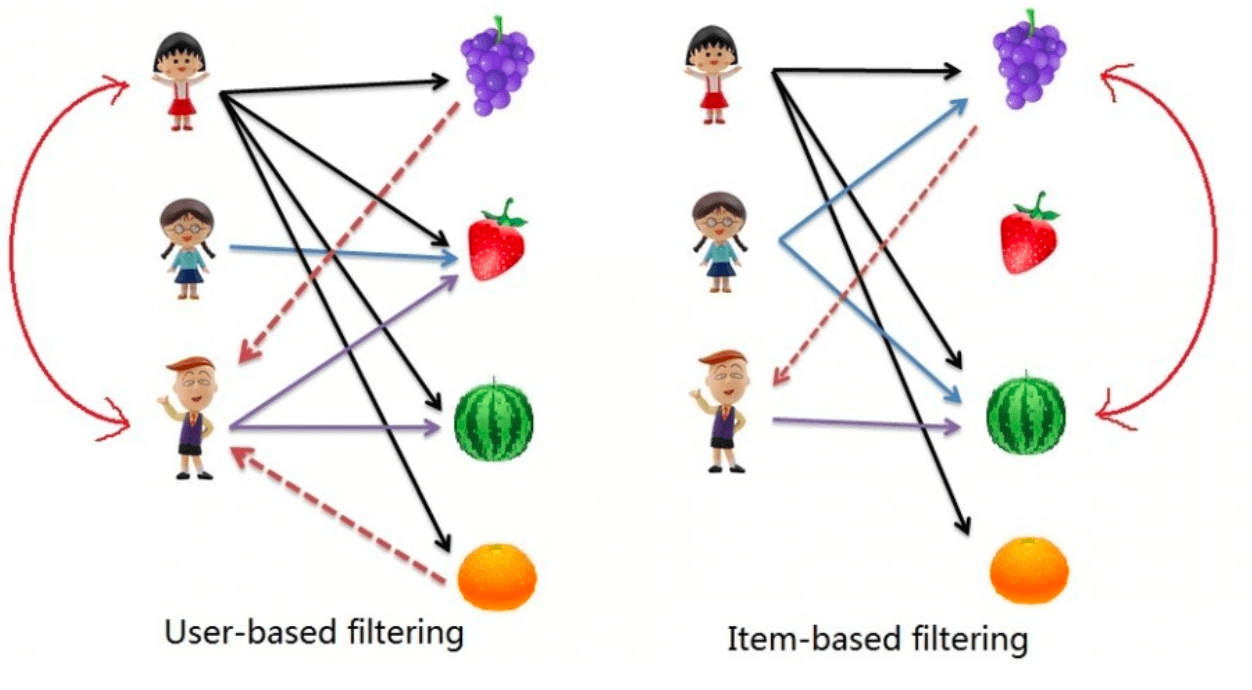


The similarity between two users is measured as a tendecy of measuring items simiarly. Pearson or Cosine distance are usually used.

### Similarity Functions

The computation of the similarity between items is critical, similar to the procedure used when comparing users. The similarity computation between two items *p* and *q* can be obtained by first isolating the users that have both rated the items (set *U*), and then applying a distance or correlation function.

- **Euclidean distance**

  $$
  \text{sim}(p,q) = \sqrt{\sum_{u \in U} (r_{u,p} - r_{u,q})^2}
  $$

- **Pearson Correlation**

  $$
  \text{sim}(p,q) = \frac{\sum_{u \in U} (r_{u,p} - \bar{r_p})(r_{u,q} - \bar{r_q})}{\sqrt{\sum_{u \in U} (r_{u,p} - \bar{r_p})^2} \sqrt{\sum_{u \in U} (r_{u,q} - \bar{r_q})^2}}
  $$

- **Cosine distance**

  $$
  \text{sim}(p,q) = \frac{\vec{p} \cdot \vec{q}}{|\vec{p}| \cdot |\vec{q}|}
  $$

Where:

* $\text{sim}(p,q)$ is the similarity between items "p" and "q".
* $U$ is the set of users that have both rated "p" and "q".
* $r_{u,p}$ is the rating of item "p" by user "u".
* $\bar{r_p}$ is the mean rating of item "p".


### WARNING : 
Computing similarity using basic cosine measure in item-based case has one important drawback: The differences in rating scale between different users are not taken into account.
The Adjusted Cosine Similarity offsets this drawback by subtracting the corresponding user average from each co-rated pair:
$$ sim(p,q) = \frac{\sum_{u \in U} (r_{u,p} - \bar{r}_u) (r_{u,j} -\bar{r}_u)}{\sqrt{ \sum_{u \in U}  (r_{u,p} - \bar{r}_u)^2}\sqrt{ \sum_{u \in U}  (r_{u,q} - \bar{r}_u)^2} } $$

### Prediction Function

$$pred(u,p) =  \frac{\sum_{q \in M}{sim(p,q)*(r_{u,q})}}{\sum_{q \in M}{sim(p,q)}} $$

**EXERCISE**<p>
Create a Item-Based recomender system and compare its performance agains the User-Based
</div>

In [28]:
from scipy.stats import pearsonr

# Returns a pearsonCorrealation-based similarity score for person1 and person2
def SimPearson(DataFrame,User1,User2,min_common_items=1):
    # GET MOVIES OF USER1
    movies_user1=DataFrame[DataFrame['user_id'] ==User1 ]
    # GET MOVIES OF USER2
    movies_user2=DataFrame[DataFrame['user_id'] ==User2 ]
    
    # FIND SHARED FILMS
    rep=pd.merge(movies_user1 ,movies_user2,on='movie_id',)
    if len(rep)==0:
        return 0    
    if(len(rep)<min_common_items):
        return 0    
    res=pearsonr(rep['rating_x'],rep['rating_y'])[0]
    if(isnan(res)):
        return 0
    return res

# Returns a pearsonCorrealation-based similarity score for movie1 and movie2
def SimPearsonItem(DataFrame,movie1,movie2,min_common_items=1):
    # GET USER THAT HAVE SEEN MOVIE1

    # GET USER THAT HAVE SEEN MOVIE2
    
    # FIND USERS THAT HAVE SEEN BOTH OF THEM
    
    # COMPUTE AND RETURN ITEM SIMILARITY
    return 0
    

### SOLUTION

In [29]:
import tqdm as tq # conda install -y tqdm

class CollaborativeFilteringItemBased:
    """ Item-Based Collaborative filtering using a custom sim(p,p'). """
    
    def __init__(self,DataFrame, similarity=SimPearsonItem, min_common_items=10, max_sim_movies=10):
        """ Constructor """
        self.sim_method=similarity# Gets recommendations for a person by using a weighted average
        self.df=DataFrame
        self.min_common_items=min_common_items
        self.max_sim_movies=max_sim_movies

    def fit(self):
        """ Prepare data structures for estimation. Similarity matrix for users """
        allMovies=set(self.df['movie_id'])
        self.sim = {}
        pbar = tq.tqdm(total=len(allMovies))
        for movie1 in allMovies:
            self.sim.setdefault(movie1, {})
            a=self.df[self.df['movie_id']==movie1][['user_id']]
            data_reduced=pd.merge(self.df,a,on='user_id')
            for movie2 in allMovies:
                # no es comparem am nosalres mateixos
                if movie1==movie2: continue
                self.sim.setdefault(movie2, {})
                if(movie1 in self.sim[movie2]):continue # since is a simetric matrix
                sim=self.sim_method(data_reduced,movie1,movie2,self.min_common_items)
                #print movie1,movie2,sim
                if(sim<0):
                    self.sim[movie1][movie2]=0
                    self.sim[movie2][movie1]=0
                else:
                    self.sim[movie1][movie2]=sim
                    self.sim[movie2][movie1]=sim  
            pbar.update(1)
        pbar.close()
                
    def predict(self, user_id, movie_id):
        if movie_id not in self.df.movie_id.unique(): # If the movie was not in the training set
            return 3.5
        totals={}
        movie_users=self.df[self.df['user_id'] ==user_id]
        rating_num=0.0
        rating_den=0.0
        allMovies=set(movie_users['movie_id'])
        
        listOrdered=sorted([(self.sim[movie_id][other],other) for other in allMovies if movie_id!=other],reverse=True)
        
        for item in range(min(len(listOrdered),self.max_sim_movies)):
            other=listOrdered[item][1]
            rating_num += self.sim[movie_id][other] * (float(movie_users[movie_users['movie_id']==other]['rating']))
            rating_den += self.sim[movie_id][other]
        if rating_den==0: 
            if self.df.rating[self.df['movie_id']==movie_id].mean()>0:
                # return the mean movie rating if there is no similar for the computation
                return self.df.rating[self.df['movie_id']==movie_id].mean()
            else:
                # else return mean user rating 
                return self.df.rating[self.df['user_id']==user_id].mean()
        return rating_num/rating_den

In [30]:
reco = CollaborativeFilteringItemBased(dataSmall_train,similarity=SimPearsonItem,min_common_items=1,max_sim_movies=10)
reco.fit()
reco.predict(user_id=2,movie_id=55)

print('RMSE for Collaborative Recomender: %s' % evaluate(reco.predict,dataSmall_train,dataSmall_test))

100%|██████████| 1179/1179 [00:00<00:00, 1328.28it/s]
/var/folders/sb/bdh1wr117yqfkv_bvrcwfxp80000gn/T/ipykernel_77442/4123738901.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rating_num += self.sim[movie_id][other] * (float(movie_users[movie_users['movie_id']==other]['rating']))


RMSE for Collaborative Recomender: 1.2364096069782406


### Advantatges

+ Item similarity used to be <b>more stable</b> than user-similarity, 
+ More scalable. The update frequency of the items similarity is not as critical than user-similarity since it is more stable
+ It uses to perform better in RMSE terms, while being also more scalable. <br>

Both advantages are related with the fact that there is usually less users than item.<br><br>


### Disadvantages
* It tends to recommend obvoius items. It is very difficult for the item-based method to discover highly different items to recommend. 
+ Why: Similarities are computed with more data. The evidence of non-popular items its really complex since there is no evidence on the similarity.
 + May be frustating for browsing/enterteiment 
 + Can be good for shopping, consumption taks